# Project 16 - Product Review NLP

## Take a look at the data

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
print(os.listdir("../input"))

['amazon_alexa.tsv']


In [3]:
Data = pd.read_csv("../input/amazon_alexa.tsv",sep='\t')
Data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
Data.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

## Take a look at the "bad" reviews

In [5]:
Data = Data[Data.rating!=5]
Data = Data[Data.rating!=4]

In [6]:
Data.head()

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [7]:
Data.shape

(409, 5)

In [8]:
Data["index"] = range(0,409)
Data = Data.set_index("index")
Data.head()

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

## What porterStemmer actually does...

In [10]:
# It is a process of normalization
text2 = "Kiss kissed kisses know knowing last lasting"
stemmer = PorterStemmer()
Norm_Word= stemmer.stem(text2)
Tokens = text2.split()
" ".join(stemmer.stem(token) for token in Tokens)

'kiss kiss kiss know know last last'

## Use PorterStemmer to process all the review text

In [11]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,409):
    review = re.sub('[^a-zA-Z]', ' ', Data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if not token in STOPWORDS]
    #contain all words that are not in stopwords dictionary
    review=' '.join(review)
    corpus.append(review)
corpus

['without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener',
 'speaker sound pretti good small setup pretti easi bought two reason rate follow instruct synch music unit know done correctli sync primari motiv purchas multipl unit',
 'like siri fact siri answer accur alexa see real need household though good bargain prime day deal',
 'differ appl play specif list music must amazon spotifi plu prime etc account must pay play music star reason everyth els',
 'like googl better',
 'sound terribl u want good music get bose',
 'much featur',
 'annoy everyth show alexa abl download spend much time tri figur phrase machin may well look',
 'know half thing ask recogn sprinkler wifi control even though product detail say compat program chang wifi thermostat set match w



##  Lets find the most commonly used words

In [12]:
words = []
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
words

['without',
 'cellphon',
 'cannot',
 'use',
 'mani',
 'featur',
 'ipad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'live',
 'room',
 'reason',
 'enough',
 'keep',
 'fun',
 'ask',
 'random',
 'question',
 'hear',
 'respons',
 'seem',
 'smartbon',
 'polit',
 'yet',
 'got',
 'second',
 'unit',
 'bedroom',
 'expect',
 'sound',
 'improv',
 'didnt',
 'realli',
 'see',
 'differ',
 'overal',
 'big',
 'improv',
 'st',
 'gener',
 'speaker',
 'sound',
 'pretti',
 'good',
 'small',
 'setup',
 'pretti',
 'easi',
 'bought',
 'two',
 'reason',
 'rate',
 'follow',
 'instruct',
 'synch',
 'music',
 'unit',
 'know',
 'done',
 'correctli',
 'sync',
 'primari',
 'motiv',
 'purchas',
 'multipl',
 'unit',
 'like',
 'siri',
 'fact',
 'siri',
 'answer',
 'accur',
 'alexa',
 'see',
 'real',
 'need',
 'household',
 'though',
 'good',
 'bargain',
 'prime',
 'day',
 'deal',
 'differ',
 'appl',
 'play',
 'specif',
 'list',
 'music',
 'must',
 'amazon',
 'sp

In [13]:
from collections import Counter
words_counts = Counter(words)
print(words_counts)

Counter({'echo': 150, 'work': 140, 'alexa': 108, 'devic': 108, 'use': 88, 'amazon': 84, 'like': 81, 'get': 77, 'dot': 76, 'time': 73, 'sound': 71, 'would': 70, 'speaker': 69, 'music': 60, 'one': 58, 'product': 57, 'tri': 53, 'thing': 53, 'play': 52, 'set': 51, 'need': 48, 'ask': 44, 'want': 44, 'buy': 44, 'connect': 43, 'screen': 43, 'better': 41, 'also': 41, 'qualiti': 40, 'show': 38, 'realli': 37, 'bought': 37, 'even': 37, 'good': 36, 'turn': 36, 'hub': 34, 'know': 33, 'well': 33, 'great': 32, 'much': 31, 'disappoint': 31, 'bulb': 31, 'could': 30, 'still': 30, 'alarm': 29, 'prime': 29, 'day': 29, 'light': 29, 'app': 27, 'back': 27, 'say': 26, 'return': 26, 'home': 26, 'see': 25, 'googl': 25, 'make': 25, 'purchas': 24, 'problem': 24, 'phone': 24, 'hear': 23, 'got': 23, 'stop': 23, 'go': 23, 'seem': 22, 'way': 22, 'money': 22, 'refurbish': 22, 'video': 22, 'question': 21, 'unit': 21, 'wifi': 21, 'mani': 20, 'differ': 20, 'plu': 20, 'understand': 20, 'sure': 20, 'item': 20, 'start': 20,

In [14]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words

[('echo', 150),
 ('work', 140),
 ('alexa', 108),
 ('devic', 108),
 ('use', 88),
 ('amazon', 84),
 ('like', 81),
 ('get', 77),
 ('dot', 76),
 ('time', 73),
 ('sound', 71),
 ('would', 70),
 ('speaker', 69),
 ('music', 60),
 ('one', 58),
 ('product', 57),
 ('tri', 53),
 ('thing', 53),
 ('play', 52),
 ('set', 51),
 ('need', 48),
 ('ask', 44),
 ('want', 44),
 ('buy', 44),
 ('connect', 43),
 ('screen', 43),
 ('better', 41),
 ('also', 41),
 ('qualiti', 40),
 ('show', 38),
 ('realli', 37),
 ('bought', 37),
 ('even', 37),
 ('good', 36),
 ('turn', 36),
 ('hub', 34),
 ('know', 33),
 ('well', 33),
 ('great', 32),
 ('much', 31),
 ('disappoint', 31),
 ('bulb', 31),
 ('could', 30),
 ('still', 30),
 ('alarm', 29),
 ('prime', 29),
 ('day', 29),
 ('light', 29),
 ('app', 27),
 ('back', 27),
 ('say', 26),
 ('return', 26),
 ('home', 26),
 ('see', 25),
 ('googl', 25),
 ('make', 25),
 ('purchas', 24),
 ('problem', 24),
 ('phone', 24),
 ('hear', 23),
 ('got', 23),
 ('stop', 23),
 ('go', 23),
 ('seem', 22),
 (

In [15]:
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

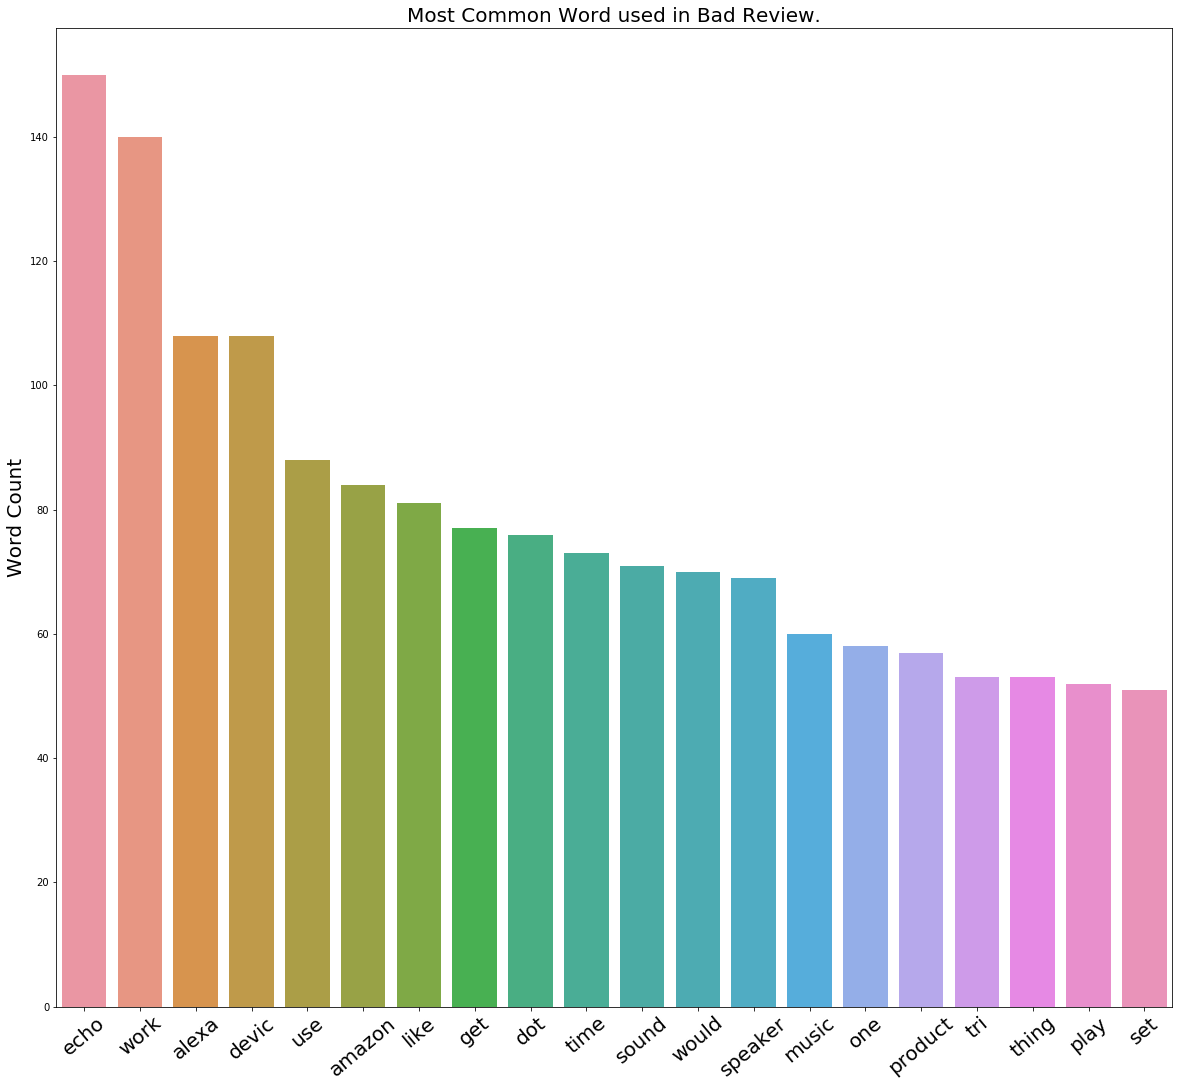

In [16]:
import seaborn as sns
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(20), most_commmom_CountList[0:20])
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(20), most_commmom_wordList[0:20], fontsize=20, rotation=40)
plt.title('Most Common Word used in Bad Review.', fontsize=20)
plt.show()

## Use TF-IDF to vectorize the review text

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
texts = ["good movie",
         "not a good movie",
         "did not like",
         "I like it",
         "good one"]
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
features = tfidf.fit_transform(texts)
tfidf.get_feature_names()

['good movie', 'like', 'movie', 'not']

In [18]:
Vectorize = TfidfVectorizer(analyzer='word',stop_words='english',ngram_range=(1, 2),min_df=2)
X = Vectorize.fit_transform(corpus).toarray()
y = Data['feedback']

## Build a model to classify the review text

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_curve,auc

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
model1 = RandomForestClassifier(n_estimators=200, max_features="auto")
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy for RandomForest:\t"+str(accuracy1))
print("Precision for RandomForest:\t"+str(precision_score(y_test,y_pred1)))
print("Recall for RandomForest:\t"+str(recall_score(y_test,y_pred1)))

Accuracy for RandomForest:	0.7378640776699029
Precision for RandomForest:	0.7272727272727273
Recall for RandomForest:	0.43243243243243246


In [23]:
model2 = GradientBoostingClassifier(learning_rate=1.5, verbose=1, max_features='auto')
model2.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1331            1.03s
         2           1.0331            0.94s
         3           0.9339            0.95s
         4           0.8461            0.92s
         5           0.7497            0.92s
         6           0.6805            0.91s
         7           0.6068            0.89s
         8           0.5270            0.88s
         9           0.4695            0.87s
        10           0.4261            0.86s
        20           0.2079            0.77s
        30           0.1589            0.67s
        40           0.1393            0.60s
        50           0.1305            0.50s
        60           0.1269            0.40s
        70           0.1247            0.30s
        80           0.1239            0.20s
        90           0.1232            0.10s
       100           0.1230            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [24]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred2)
print("Accuracy for GradientBoosting:\t"+str(accuracy2))
print("Precision for GradientBoosting:\t"+str(precision_score(y_test,y_pred2)))
print("Recall for GradientBoosting:\t"+str(recall_score(y_test,y_pred2)))

Accuracy for GradientBoosting:	0.6990291262135923
Precision for GradientBoosting:	0.6153846153846154
Recall for GradientBoosting:	0.43243243243243246


In [25]:
prob_1=model1.predict_proba(x_test)
prob_1 = prob_1[:,1]# Probalility prediction for Rangomforest classifier
prob_2=model2.predict_proba(x_test)
prob_2 = prob_2[:,1]# Probalility prediction for GradientBoosting classifier

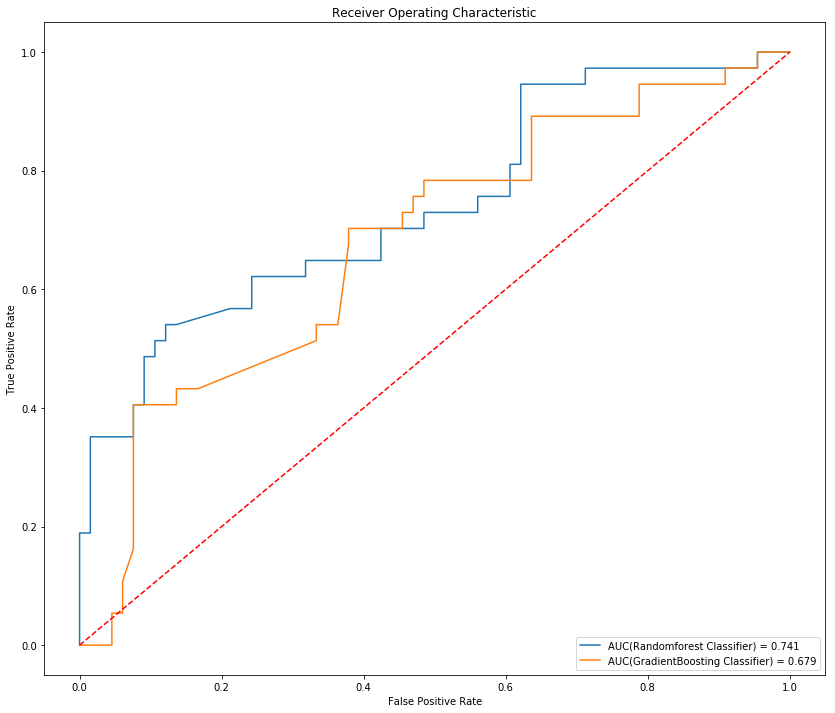

In [26]:
fpr1, tpr1, _ = roc_curve(y_test, prob_1)
fpr2, tpr2, _ = roc_curve(y_test, prob_2)
plt.figure(figsize=(14,12))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, label = 'AUC(Randomforest Classifier) = %0.3f' % auc(fpr1, tpr1))
plt.plot(fpr2, tpr2, label = 'AUC(GradientBoosting Classifier) = %0.3f' % auc(fpr2, tpr2))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()